In [2]:
#importing necessary packages

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from pathlib import Path
import os, pickle
import numpy as np

In [3]:
tf.__version__

'2.16.1'

In [2]:
#Loading pickle files

file_path_X = open(os.path.join(r"D:\major_project\megha\project-1\data_final\train\X.pickle"), 'rb')
file_path_Y = open(os.path.join(r"D:\major_project\megha\project-1\data_final\train\y.pickle"), 'rb')
X = pickle.load(file_path_X)
y = pickle.load(file_path_Y)

In [3]:
number_of_classes = max(y) + 1 #Number of classes
number_of_classes

156

In [4]:
X = X/255.0 #Normalising the images

In [5]:
print(X.shape,len(y))

(50683, 64, 64, 1) 50683


In [6]:
y=np.array(y)

In [7]:
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten()) #Transforms all information from previous convolutions into inputs for neurons
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer for given number of classes
model.add(Dense(number_of_classes))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss=tf.compat.v1.losses.sparse_softmax_cross_entropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

d:\anaconda\envs\pythonprojects\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 156)            │        20,124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 156)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,572 (830.36 KB)

 Trainable params: 212,572 (830.36 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.3078 - loss: 2.9112 - val_accuracy: 0.7530 - val_loss: 0.7940
Epoch 2/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 59s 41ms/step - accuracy: 0.7583 - loss: 0.7640 - val_accuracy: 0.8369 - val_loss: 0.5202
Epoch 3/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.8281 - loss: 0.5292 - val_accuracy: 0.8641 - val_loss: 0.4349
Epoch 4/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.8636 - loss: 0.4135 - val_accuracy: 0.8706 - val_loss: 0.3901
Epoch 5/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.8784 - loss: 0.3605 - val_accuracy: 0.8822 - val_loss: 0.3871
Epoch 6/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.8932 - loss: 0.3152 - val_accuracy: 0.8895 - val_loss: 0.3467
Epoch 7/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.9025 - loss: 0.2869 - val_accuracy: 0.8986 - val_loss: 0.3265
Epoch 8/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.9105 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


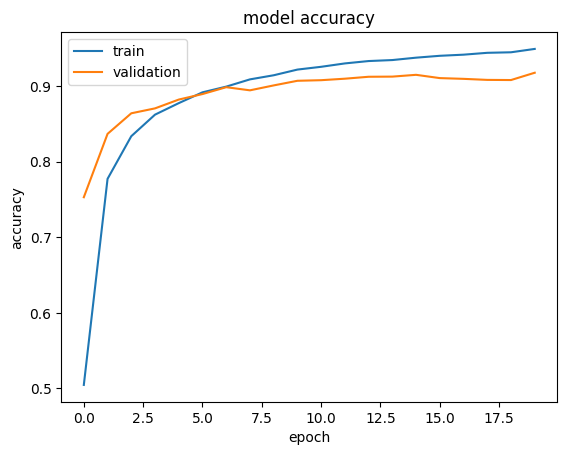

In [10]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [12]:

model.save(r'D:\major_project\megha\project-1\model_trained\Image_model_v1.keras')
print("Saved model to disk")

Saved model to disk
